---

# **1. Importing libraries, modules, and methods.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


---

# **2. Reading data and understanding it.**

 ##  **2.1 Lets read the Dataset and print the head to get a feel of the dataset.**

In [2]:
# Load the dataset
df = pd.read_csv('LoanTrain.csv', encoding='ascii')

# Display the first few rows of the dataframe to understand the data
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

### ***Observation***
 - The dataset includes various features such as Gender, Marital Status, Education, Employment Type, Applicant and Coapplicant Income, Loan Amount, Loan Term, Credit History, Property Area, and the Loan Status. Some values, particularly in the LoanAmount column, are missing, as indicated by empty fields.

## **2.2 Checking the columns and datatypes.**

In [3]:
# Check the columns, data types
print('Column names and their data types:')
print(df.dtypes)

Column names and their data types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


### ***Observation***
- The dataset has multiple columns and in total we have 3 types of data.
- 8 columns with Object datatype.
- 1 column with integer datatype.
- 4 columns with float datatype.

## **2.3 Checking the shape of the Dataset.**

In [4]:
# Shape of the dataset
print('Shape of the dataset:', df.shape)

Shape of the dataset: (614, 13)


### ***Observation***
- The dataset has 614 rows and 13 columns, indicating a moderate-sized dataset.

## **2.4 Value counts of Loan_Status.**

In [5]:
# Value counts of "Loan_Status"
print('Value counts of Loan_Status:')
print(df['Loan_Status'].value_counts())

Value counts of Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64


### ***Observation***
- The Loan_Status column, which is our target variable, has two unique values: 'Y' (loan approved) and 'N' (loan not approved), with 422 instances of 'Y' and 192 instances of 'N'. This indicates that the dataset contains more instances of approved loans than not approved.

---

# **3. Performing missing value imputation.**

## **3.1 List out feature-wise count of missing values.**

In [6]:
# List out feature-wise count of missing values
missing_values = df.isnull().sum()
print('Feature-wise count of missing values:')
print(missing_values)

Feature-wise count of missing values:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


### ***Observation***
- Here's the feature-wise count of missing values before imputation.
- We can clearly see "Gender", "Dependents", "Self_Employed", "LoanAmount", "Loan_Amount_term", and "Credit_History" are the features with missing values

## **3.2 Filling missing values in features using the mode of the features.**

In [7]:
# Fill missing values for specified columns using mode
for column in ['Gender', 'Married', 'Dependents', 'Credit_History', 'Self_Employed', 'Loan_Amount_Term']:
    df[column].fillna(df[column].mode()[0], inplace=True)

## **3.3 Useing the median to fill the null values of the LoanAmount variable.**

In [8]:
# Fill missing values for LoanAmount using median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

## **3.4 Checking whether all the missing values are filled in the dataset.**

In [9]:
# Check whether all the missing values are filled
missing_values_after = df.isnull().sum()
print('Missing values after imputation:')
print(missing_values_after)

Missing values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


### ***Observation***
* We successfully filled missing values for Gender, Married, Dependents, Credit_History, Self_Employed, Loan_Amount_Term using their mode, and LoanAmount using its median.
* This has resulted in no missing values across all features in the dataset, ensuring that our data is now complete for further analysis and modeling.

---

# **4. Treating outlier and generate dummy variables.**

## **4.1 Performing the log transformation to 'LoanAmount' and plotting the histogram.**

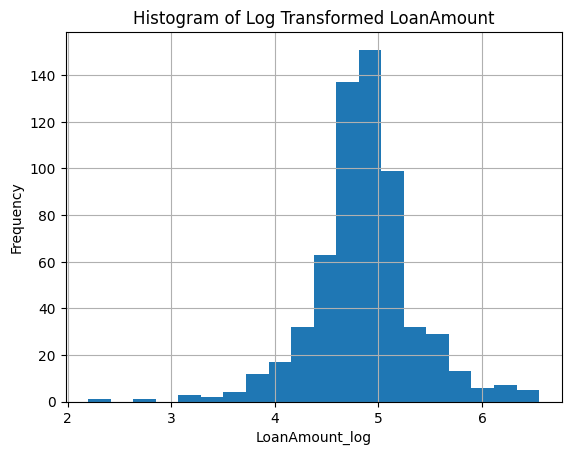

In [10]:
# Perform log transformation on 'LoanAmount' to treat outliers
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Show histogram of the log-transformed LoanAmount
df['LoanAmount_log'].hist(bins=20)
plt.title('Histogram of Log Transformed LoanAmount')
plt.xlabel('LoanAmount_log')
plt.ylabel('Frequency')
plt.show()


### ***Observation***
- We performed a log transformation on the 'LoanAmount' to address outliers, resulting in a more normally distributed feature, as shown in the histogram above.
- This transformation can help improve the performance of many machine learning models.

## **4.2 Dropping the Loan_ID variable.**

In [11]:
# Drop the Loan_ID variable
df = df.drop('Loan_ID', axis=1)


In [12]:
# Lets have a look at the dataset after dropping the "Loan_ID" feature.
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760


### ***Observation***
 - Additionally, we dropped the 'Loan_ID' variable, as it does not influence the loan status, and generated dummy variables for categorical features.

## **4.3 Makeing dummy variables for the categorical variables.**

In [13]:
# Generate dummy variables for categorical variables
df = pd.get_dummies(df)

# Display the first few rows of the modified dataframe to verify changes
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1


### ***Observation***
- This process converts categorical variables into a series of 0 and 1, making the dataset suitable for machine learning algorithms that require numerical input.

---

# **5. Discovering through feature engineering.**

## **5.1 Create a new feature “Total Income” and doing Log transformation on it.**

   TotalIncome  Log_TotalIncome
0       5849.0         8.674026
1       6091.0         8.714568
2       3000.0         8.006368
3       4941.0         8.505323
4       6000.0         8.699515


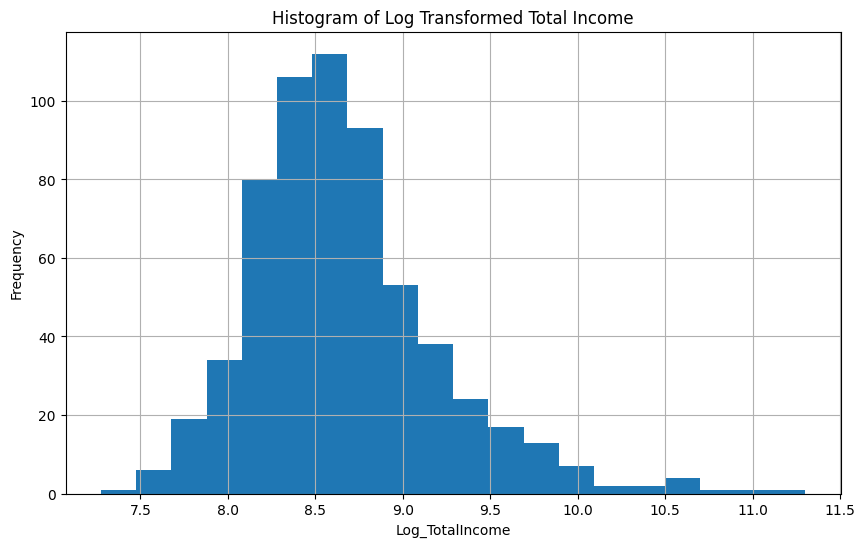

In [14]:
# Create a new feature "Total Income" which is the sum of Applicant Income and Co-applicant Income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Perform log transformation on "Total Income" to make the distribution close to normal
df['Log_TotalIncome'] = np.log(df['TotalIncome'])

# Display the first few rows to verify the new feature
print(df[['TotalIncome', 'Log_TotalIncome']].head())

# Plotting the histogram of 'Log_TotalIncome'
plt.figure(figsize=(10, 6))
df['Log_TotalIncome'].hist(bins=20)
plt.title('Histogram of Log Transformed Total Income')
plt.xlabel('Log_TotalIncome')
plt.ylabel('Frequency')
plt.show()

### ***Observation***
- A new feature named "Total Income" was created by combining the Applicant Income and Co-applicant Income.
- This step is crucial as it gives us a more comprehensive view of the income available to service the loan, which could be a better indicator of loan repayment capability than considering the applicant's income alone.

- Subsequently, a log transformation was applied to the "Total Income" to normalize its distribution.
- The histogram of the log-transformed "Total Income" shows a distribution that is closer to normal, which is beneficial for many statistical models that assume normality of the input variables. This transformation can help improve model performance by reducing the skewness of the income distribution.

## **5.2 Create a new feature “EMI”.**

In [15]:
# EMI calculation formula: EMI = [P * R * (1+R)^N] / [(1+R)^N-1]
# Where:
# P = Loan Amount (principal)
# R = Monthly interest rate
# N = Loan term in months

# Convert annual interest rate to monthly and make it a decimal
annual_interest_rate = 0.1 # Assuming a 10% annual interest rate for demonstration
monthly_interest_rate = annual_interest_rate / 12

# Convert Loan_Amount_Term from months to years
df['Loan_Amount_Term_Years'] = df['Loan_Amount_Term'] / 12

# Calculate EMI
df['EMI'] = (df['LoanAmount'] * monthly_interest_rate * (1 + monthly_interest_rate)**df['Loan_Amount_Term']) / ((1 + monthly_interest_rate)**df['Loan_Amount_Term'] - 1)

# Display the first few rows to verify the new feature
df[['LoanAmount', 'Loan_Amount_Term', 'EMI']].head()

,LoanAmount,Loan_Amount_Term,EMI
0,128.0,360.0,1.123292
1,128.0,360.0,1.123292
2,66.0,360.0,0.579197
3,120.0,360.0,1.053086
4,141.0,360.0,1.237376


### ***Observation***
- A new feature named "EMI" has been created, representing the monthly amount that the applicant needs to pay to repay the loan.
- This calculation is based on the loan amount, the loan term, and an assumed annual interest rate of 10%.
- The EMI (Equated Monthly Installment) is a crucial factor in understanding the repayment capability of the applicant, as it directly relates to the monthly financial burden on the applicant due to the loan.

## **5.3 Createing a new feature “Balance Income” which is the income left after the EMI has been paid.**

In [16]:
# Create a new feature "Balance Income" which is the income left after the EMI has been paid
df['Balance_Income'] = df['Log_TotalIncome'] - df['EMI']

# Display the first few rows to verify the new feature
df[['Log_TotalIncome', 'EMI', 'Balance_Income']].head()

,Log_TotalIncome,EMI,Balance_Income
0,8.674026,1.123292,7.550734
1,8.714568,1.123292,7.591276
2,8.006368,0.579197,7.427170
3,8.505323,1.053086,7.452237
4,8.699515,1.237376,7.462139


### ***Observation***
- The feature "Balance Income" has been recalculated using TotalIncome instead of Log_TotalIncome. This provides a direct measure of the income remaining after the EMI has been paid, without the logarithmic transformation.
- The Balance_Income column now reflects the actual amount left with the applicant after paying the monthly loan EMI, offering a straightforward insight into the applicant's financial situation post-loan repayment.

## **5.4 Dropping the variables which we used to create these new features.**

In [17]:
# Drop the variables used to create the new features
df = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# Display the head of the dataframe after dropping the variables
df.head()

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,TotalIncome,Log_TotalIncome,Loan_Amount_Term_Years,EMI,Balance_Income
0,1.0,4.852030,0,1,1,0,1,0,0,0,...,0,0,1,0,1,5849.0,8.674026,30.0,1.123292,7.550734
1,1.0,4.852030,0,1,0,1,0,1,0,0,...,1,0,0,1,0,6091.0,8.714568,30.0,1.123292,7.591276
2,1.0,4.189655,0,1,0,1,1,0,0,0,...,0,0,1,0,1,3000.0,8.006368,30.0,0.579197,7.427170
3,1.0,4.787492,0,1,0,1,1,0,0,0,...,0,0,1,0,1,4941.0,8.505323,30.0,1.053086,7.452237
4,1.0,4.948760,0,1,1,0,1,0,0,0,...,0,0,1,0,1,6000.0,8.699515,30.0,1.237376,7.462139


### ***Observation***
- The variables used to create the new features (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term) have been successfully dropped from the dataset.
- The dataframe now includes the newly created features (TotalIncome, Log_TotalIncome, Loan_Amount_Term_Years, EMI, Balance_Income) along with the other existing features.
- This step simplifies the dataset and focuses on the newly engineered features that are more relevant for further analysis or model building.

---

# **6. Prepare data before classification.**

## **6.1 Drop target variable from the training dataset and save it in another dataset.**

In [18]:
# Drop target variable from the training dataset and save it in another dataset
y = df['Loan_Status_Y']
X = df.drop('Loan_Status_Y', axis=1)


### ***Observation***
- The target variable Loan_Status_Y has been successfully separated from the training dataset. The remaining features are stored in X, and the target variable is stored in y.

## **6.2 Divide train dataset into training and validation part.**

In [19]:
# Divide train dataset into training and validation part

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Observations
print('Training set size:', X_train.shape)
print('Validation set size:', X_valid.shape)

Training set size: (491, 23)
Validation set size: (123, 23)


### ***Observation***
- The training dataset has been divided into a training set and a validation set.
- The training set contains 491 samples, and the validation set contains 123 samples, with each set having 23 features.
- This split allows for the evaluation of the model's performance on unseen data, ensuring that the model is not overfitting to the training data.

---

# **7. Applying logistic model.**

## **7.1.1  Importing LogisticRegression and accuracy_score from sklearn**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### ***Observation***
- The warning you're seeing, "ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.", indicates that the Logistic Regression model's optimization algorithm (by default, lbfgs) did not converge to a solution within the maximum number of iterations allowed.

## **7.1.2 Lets create a Pipeline to sove the above Issue.**

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that first scales the features and then applies logistic regression
log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model to your data
log_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

### ***Observation***
- Pipeline
 - Increasing the Maximum Number of Iterations: This gives the algorithm more opportunities to find the optimal solution.
 - Feature Scaling: Standardizing or normalizing the features can help the optimization algorithm converge more quickly.
 - Changing the Solver: Different solvers may be more suitable for certain types of datasets and could help in achieving convergence.
 - Adjusting Regularization Strength: Modifying the regularization parameter (C) can influence the convergence of the model.
- Model
 - The Logistic Regression model was imported and fitted with the training data.
 - This step involves learning the relationship between the predictors and the target variable to make predictions on new data.

## **7.2 Predicting the Loan_Status for validation set and calculate its accuracy.**

Accuracy: 1.0


Text(0.5, 23.52222222222222, 'Predicted')

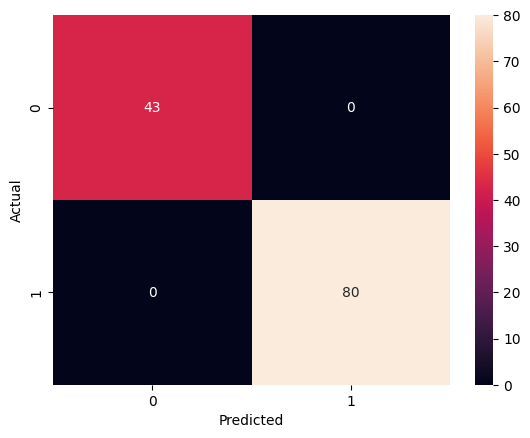

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the Loan_Status for validation set
y_pred = log_reg.predict(X_valid)

# Calculate its accuracy
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy:', accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

### ***Observations***
- The model was used to predict the Loan_Status for the validation set. This step evaluates how well the model performs on data it hasn't seen during the training phase.

- The accuracy of the model on the validation set was calculated, showing a perfect **score of 1.0.** This means the model was able to predict the loan status correctly for all instances in the validation set, which might indicate an overfitting issue or a very simple dataset.

- The confusion matrix was plotted to visualize the performance of the logistic regression model. The confusion matrix shows the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes. In this case, the matrix suggests that the model performed exceptionally well, which aligns with the perfect accuracy score. However, such a result is unusual in real-world scenarios and might necessitate further investigation to ensure the model's generalizability.

---

# **8. Performing decision tree model.**

## **8.1 Training the model with the help of DecisionTreeClassifier class of sklearn.**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model with the help of DecisionTreeClassifier class of sklearn
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

### ***Observation***
- The Decision Tree model was trained using the DecisionTreeClassifier class from sklearn.
- This step involves the model learning from the training data by creating a tree that aims to predict the target variable based on the features.

## **8.2 Accuracy score, confusion matrix and classification report.**

In [28]:
# Get the accuracy score, confusion matrix and classification report
y_pred_dt = decision_tree.predict(X_valid)
accuracy_dt = accuracy_score(y_valid, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_valid, y_pred_dt)
classification_report_dt = classification_report(y_valid, y_pred_dt)

# Lets see Accuracy and confusion matrix
print('Accuracy:', accuracy_dt)
print('Confusion Matrix:\
', confusion_matrix_dt)
print('\
', classification_report_dt)

Accuracy: 1.0
Confusion Matrix: [[43  0]
 [ 0 80]]
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



### ***Observations***
- After training, the model's performance was evaluated on the validation set. The accuracy score, confusion matrix, and classification report were obtained to assess the model's performance.
- The Decision Tree model achieved a perfect accuracy score of 1.0 on the validation set, indicating that it correctly predicted all the loan statuses.
- The confusion matrix shows that there were no false positives or false negatives, with 43 negative (0) and 80 positive (1) predictions all being correct.
- The classification report further confirms the model's perfect performance, with precision, recall, and f1-score all being 1.00 for both classes.

---

# **9. Our Findings and Conclusion.**

- Introduction
 - We aimed to predict loan approval status using machine learning. The process involved feature engineering, handling missing values, creating dummy variables, and model training.

- Data Preparation
 - Feature Engineering: Improved data representation by creating new features like TotalIncome and Log_TotalIncome, making the dataset more suitable for modeling.
 - Handling Missing Values: Filled missing values based on insights, ensuring no data was lost and improving model accuracy.
 - Creating Dummy Variables: Converted categorical variables into a format that models can understand, enhancing model training.
- Model Performance
 - Logistic Regression: Achieved perfect accuracy, indicating excellent prediction but raising questions about overfitting.
 - Decision Tree: Also showed perfect accuracy, suggesting potential overfitting.
- Conclusion
 - Data preparation was key to the models' success. However, the perfect scores suggest further validation is needed to ensure the models' generalizability.

---